In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance 
#import community    

In [13]:
K = nx.karate_club_graph()
#K = nx.read_edgelist('dblp.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(K))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


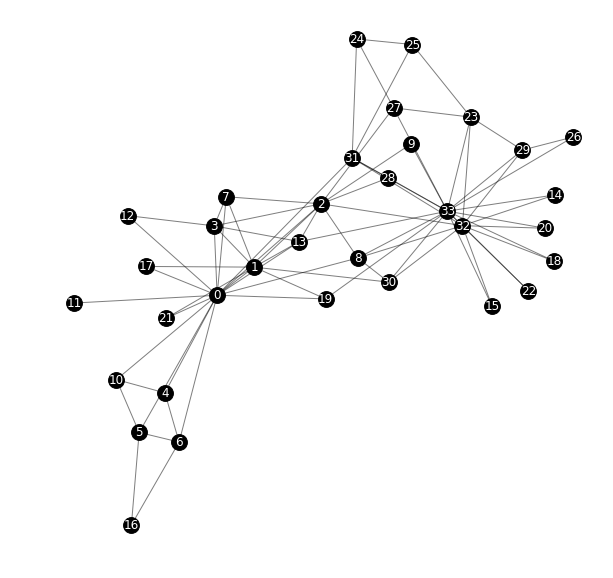

In [19]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(10,10));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=250, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show();

In [20]:
_SQRT2 = np.sqrt(2) 
def hellinger3(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

In [21]:
def create_hc(G, t):
    labels=G.nodes()
    path_length=dict(nx.all_pairs_shortest_path_length(G))
    distances=np.zeros((len(G),len(G)))   
    for u,p in path_length.items():
        for v,d in p.items():
            if(u in G.nodes() and v in G.nodes()):
                distances[u][v] = d
                distances[v][u] = d
                if u==v: distances[u][u]=0
    Y = distance.pdist(distances,hellinger3)
    Z = hierarchy.average(Y)
    membership=list(hierarchy.fcluster(Z,t=t))
    partition = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        partition[p].append(labels[n])
    return Z, membership, partition

In [22]:
Z, membership, partition = create_hc(K, t=1.15) 

In [27]:
partition = {}
for i in range(len(membership)):
    partition[i]=membership[i]

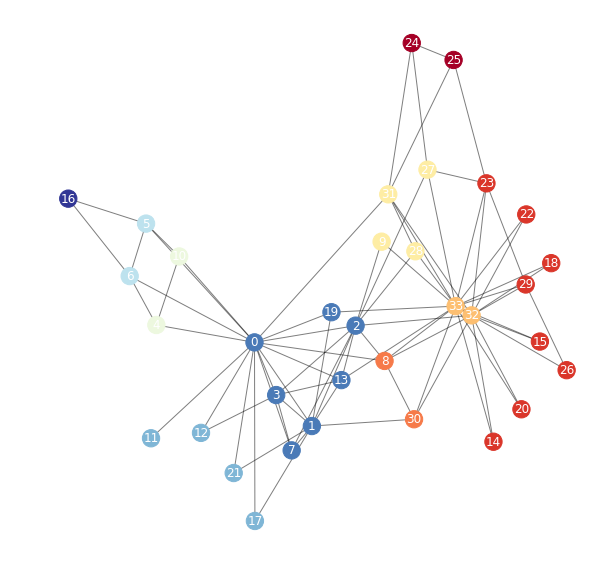

In [25]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(K, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(K, pos, alpha=0.5)
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show()

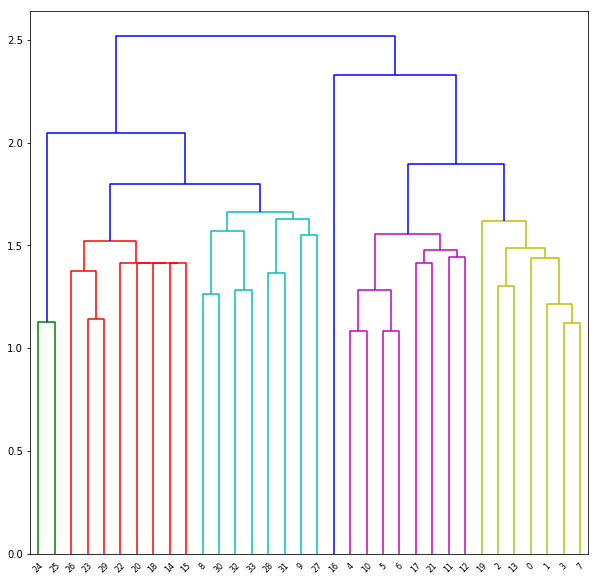

In [26]:
plt.figure(figsize=(10,10))
hierarchy.dendrogram(Z)
plt.show()